In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def relu(x):
    r = np.maximum(x,0)
    return r
def derivative_relu(x):
    x = np.array(x > 0,dtype = np.float32)
    return x
def zscore(x):
    mu = np.mean(x,axis = 0)
    sigma = np.std(x,axis = 0)
    x_norm = (x -mu)/sigma
    return x_norm
def sigmoid(x):
    g = 1/(1 + np.exp(-x))
    return g
def multi_to_binary(y):
    y = y + 1
    y_1 = set(y)
    y_1 = np.array(list(y_1))
    n = y_1.shape[0]
    m = y.shape[0]
    t = np.zeros((n,m))
    T = np.zeros((n,m))
    for i in range(n):
        t[i] = y
    for i in range(n):
        q = t[i]
        for j in range(m):
            if q[j] == y_1[i]:
                q[j] = 1
            elif q[j] < y_1[i]:
                q[j] = 0
            elif q[j] > y_1[i]:
                q[j] = 0
        T[i] = q
    return T
def predict(x,parameters):
    m = x.shape[1]
    _,y_pred =forward_propagation(x,parameters)
    y_pred = np.argmax(y_pred,axis = 0)
    return y_pred
def acc(y_train,y_pred):
    acc = np.mean(y_train == y_pred)*100
    return acc

In [3]:
def initialize(layer):
    l = len(layer) - 1
    parameters = {}
    for i in range(1, l+1):
        parameters["w" + str(i)] = np.random.randn(layer[i],layer[i-1])*0.001
        parameters["b" + str(i)] = np.zeros((layers_dim[i],1))
    return parameters

In [4]:
def forward_propagation(x,parameters):
    forward_parameters = {}
    L = len(parameters)//2
    forward_parameters["A0"] = x
    for i in range(1,L):
        forward_parameters["Z" + str(i)] = parameters["w" + str(i)].dot(forward_parameters["A" + str(i - 1)]) + parameters["b" + str(i)]
        forward_parameters["A" + str(i)] = relu(forward_parameters["Z" + str(i)])
    forward_parameters["Z" + str(L)] = parameters["w" + str(L)].dot(forward_parameters["A" + str(L - 1)]) + parameters["b" + str(L)]
    forward_parameters["A" + str(L)] = sigmoid(forward_parameters["Z" + str(L)])
    return forward_parameters,forward_parameters["A" + str(L)]

In [5]:
def cost(AL,Y):
    m = Y.shape[1]
    cost = (1./m)*np.sum(-Y*np.log(AL)-(1- Y)*np.log(1 - AL))
    cost = np.squeeze(cost)
    return cost

In [6]:
def backward_propagation(AL,Y,parameters,forward_parameters):
    grads = {}
    L = len(parameters)//2
    m = Y.shape[1]
    
    grads["dz" + str(L)] = AL - Y
    grads["dw" + str(L)] = (1/m)*np.dot(grads["dz" + str(L)],forward_parameters["A" + str(L - 1)].T)
    grads["db" + str(L)] = (1/m)*np.sum(grads["dz" + str(L)],axis = 1,keepdims = True)
    for i in reversed(range(1,L)):
        grads["dz" + str(i)] = np.dot(parameters["w" + str(i+1)].T,grads["dz" + str(i+1)])*derivative_relu(forward_parameters["A" + str(i)])
        grads["dw" + str(i)] = (1/m)*np.dot(grads["dz" + str(i)],forward_parameters["A" + str(i-1)].T)
        grads["db" + str(i)] = (1/m)*np.sum(grads["dz" + str(i)],axis = 1,keepdims = True)
    return grads

In [7]:
def update_parameters(parameters,grads,learning_rate):
    L = len(parameters)//2
    for i in range(1,L):
        parameters["w" + str(i)] = parameters["w" + str(i)] - learning_rate*grads["dw" + str(i)]
        parameters["b" + str(i)] = parameters["b" + str(i)] - learning_rate*grads["db" + str(i)]
    return parameters

In [8]:
def model(x,y,layer,learning_rate,iteration):
    parameters = initialize(layer)
    j_history = []
    for i in range(iteration):
        forward_parameters,AL = forward_propagation(x,parameters)
        j_cost = cost(AL,y)
        grads = backward_propagation(AL,y,parameters,forward_parameters)
        parameters = update_parameters(parameters,grads,learning_rate)
        acc = accuracy(x,y,parameters)
        print("for iteration :",i,"cost = ", j_cost ,"accuracy",acc)
        j_history.append(j_cost)
    return parameters,j_history

In [9]:
def accuracy(X,Y,parameters):
    m = Y.shape[1]
    _,preds = forward_propagation(X,parameters)
    Y = np.argmax(Y,0)
    preds = np.argmax(preds,axis = 0)
    return np.round(np.sum(Y == preds)/m,2)

In [11]:
dataset = pd.read_csv("classification_train.csv")
x_train = dataset.iloc[:,2:786].values
y_train = dataset.iloc[:,1:2].values
x_train = x_train.T
y_train_multiclass = y_train
y_train = y_train.T
x_train = zscore(x_train)
print(y_train.shape)
y_train_multiclass = y_train_multiclass.flatten()
tt = multi_to_binary(y_train_multiclass)

(1, 30000)


In [12]:
layers_dim = [784,40,30,10]
lr = 20
iters = 1000
parameters,j_history = model(x_train,tt,layers_dim,lr,iters)

cost is : 0 cost =  6.931472275968498 accuracy 0.1
cost is : 1 cost =  6.9313984361423095 accuracy 0.1
cost is : 2 cost =  6.931098596158797 accuracy 0.1
cost is : 3 cost =  6.93079014756605 accuracy 0.1
cost is : 4 cost =  6.930431909350881 accuracy 0.1
cost is : 5 cost =  6.929806053789716 accuracy 0.1
cost is : 6 cost =  6.927746041822704 accuracy 0.1
cost is : 7 cost =  6.918030150319409 accuracy 0.1
cost is : 8 cost =  6.868306929244665 accuracy 0.1
cost is : 9 cost =  6.632030135055979 accuracy 0.1
cost is : 10 cost =  5.9334019549937675 accuracy 0.09
cost is : 11 cost =  5.25460473532703 accuracy 0.1
cost is : 12 cost =  4.720336682867783 accuracy 0.1
cost is : 13 cost =  4.374662848626691 accuracy 0.1
cost is : 14 cost =  4.220815800738379 accuracy 0.1
cost is : 15 cost =  4.141058672118069 accuracy 0.1
cost is : 16 cost =  4.097771389507956 accuracy 0.1
cost is : 17 cost =  4.070270683768216 accuracy 0.1
cost is : 18 cost =  4.050125434158606 accuracy 0.1
cost is : 19 cost =  

cost is : 155 cost =  3.4915355977980824 accuracy 0.15
cost is : 156 cost =  3.4878777986761524 accuracy 0.15
cost is : 157 cost =  3.484239134013456 accuracy 0.16
cost is : 158 cost =  3.4806160781306636 accuracy 0.17
cost is : 159 cost =  3.4770088684012572 accuracy 0.17
cost is : 160 cost =  3.4734127102973154 accuracy 0.17
cost is : 161 cost =  3.469829537371789 accuracy 0.18
cost is : 162 cost =  3.4662558435049386 accuracy 0.18
cost is : 163 cost =  3.462689614400848 accuracy 0.19
cost is : 164 cost =  3.4591262546706116 accuracy 0.19
cost is : 165 cost =  3.455564476834226 accuracy 0.19
cost is : 166 cost =  3.452008526812624 accuracy 0.19
cost is : 167 cost =  3.4484567963896824 accuracy 0.2
cost is : 168 cost =  3.4449068769042412 accuracy 0.2
cost is : 169 cost =  3.4413597399050984 accuracy 0.2
cost is : 170 cost =  3.4378161835988927 accuracy 0.21
cost is : 171 cost =  3.4342753138947035 accuracy 0.21
cost is : 172 cost =  3.4307372846243793 accuracy 0.21
cost is : 173 cost

cost is : 306 cost =  2.374454368650689 accuracy 0.48
cost is : 307 cost =  2.3697601664708916 accuracy 0.49
cost is : 308 cost =  2.366588989813232 accuracy 0.48
cost is : 309 cost =  2.362279443674373 accuracy 0.49
cost is : 310 cost =  2.3588668033324374 accuracy 0.49
cost is : 311 cost =  2.3549863570228706 accuracy 0.49
cost is : 312 cost =  2.35140246339923 accuracy 0.49
cost is : 313 cost =  2.347912197102154 accuracy 0.5
cost is : 314 cost =  2.344189933135034 accuracy 0.49
cost is : 315 cost =  2.34099890782247 accuracy 0.5
cost is : 316 cost =  2.3371790283526637 accuracy 0.49
cost is : 317 cost =  2.3343171531466815 accuracy 0.5
cost is : 318 cost =  2.330479538921504 accuracy 0.49
cost is : 319 cost =  2.327918239447106 accuracy 0.5
cost is : 320 cost =  2.3240124489910685 accuracy 0.5
cost is : 321 cost =  2.3216336171559298 accuracy 0.5
cost is : 322 cost =  2.3176761034583166 accuracy 0.5
cost is : 323 cost =  2.3155412047007875 accuracy 0.5
cost is : 324 cost =  2.31151

cost is : 457 cost =  2.011370194075374 accuracy 0.65
cost is : 458 cost =  2.008486776665129 accuracy 0.64
cost is : 459 cost =  2.00794828635707 accuracy 0.65
cost is : 460 cost =  2.005095845838619 accuracy 0.65
cost is : 461 cost =  2.0045749620731357 accuracy 0.65
cost is : 462 cost =  2.00177971902873 accuracy 0.65
cost is : 463 cost =  2.00124005727219 accuracy 0.66
cost is : 464 cost =  1.9985022629894773 accuracy 0.65
cost is : 465 cost =  1.9979906180645155 accuracy 0.66
cost is : 466 cost =  1.9952987808826699 accuracy 0.65
cost is : 467 cost =  1.994786831466546 accuracy 0.66
cost is : 468 cost =  1.9921244368691229 accuracy 0.65
cost is : 469 cost =  1.9916564233319074 accuracy 0.66
cost is : 470 cost =  1.989026666660004 accuracy 0.65
cost is : 471 cost =  1.98859904709098 accuracy 0.66
cost is : 472 cost =  1.9860095213850482 accuracy 0.65
cost is : 473 cost =  1.9855704660203959 accuracy 0.66
cost is : 474 cost =  1.982967367506438 accuracy 0.66
cost is : 475 cost =  1.

cost is : 608 cost =  1.8323330774407713 accuracy 0.7
cost is : 609 cost =  1.8321638281632364 accuracy 0.7
cost is : 610 cost =  1.8306118892758194 accuracy 0.7
cost is : 611 cost =  1.8304538723728152 accuracy 0.7
cost is : 612 cost =  1.8288926379529735 accuracy 0.7
cost is : 613 cost =  1.8287433015688659 accuracy 0.7
cost is : 614 cost =  1.8271917520580905 accuracy 0.7
cost is : 615 cost =  1.8270156962042206 accuracy 0.7
cost is : 616 cost =  1.8254817555616802 accuracy 0.7
cost is : 617 cost =  1.8253138687959425 accuracy 0.7
cost is : 618 cost =  1.823804843194491 accuracy 0.7
cost is : 619 cost =  1.823643340245009 accuracy 0.7
cost is : 620 cost =  1.8221491738888898 accuracy 0.71
cost is : 621 cost =  1.821983552989655 accuracy 0.7
cost is : 622 cost =  1.8205047089898119 accuracy 0.71
cost is : 623 cost =  1.820351696759849 accuracy 0.7
cost is : 624 cost =  1.8188737410591027 accuracy 0.71
cost is : 625 cost =  1.8187226211221743 accuracy 0.7
cost is : 626 cost =  1.81725

cost is : 759 cost =  1.7441466422127845 accuracy 0.72
cost is : 760 cost =  1.751787214208759 accuracy 0.71
cost is : 761 cost =  1.7429801799912974 accuracy 0.72
cost is : 762 cost =  1.7506664614367335 accuracy 0.71
cost is : 763 cost =  1.7418115804989738 accuracy 0.72
cost is : 764 cost =  1.7495288931168784 accuracy 0.71
cost is : 765 cost =  1.7404668615237788 accuracy 0.72
cost is : 766 cost =  1.7481697048210016 accuracy 0.71
cost is : 767 cost =  1.7392997509240915 accuracy 0.72
cost is : 768 cost =  1.7471597934650511 accuracy 0.71
cost is : 769 cost =  1.7384525749314916 accuracy 0.72
cost is : 770 cost =  1.7464323669420632 accuracy 0.71
cost is : 771 cost =  1.7376923742425041 accuracy 0.72
cost is : 772 cost =  1.745725605737989 accuracy 0.71
cost is : 773 cost =  1.7369086741963389 accuracy 0.73
cost is : 774 cost =  1.7449361434230526 accuracy 0.71
cost is : 775 cost =  1.7363007639681984 accuracy 0.73
cost is : 776 cost =  1.744387504795596 accuracy 0.71
cost is : 777

cost is : 909 cost =  1.6555165193210224 accuracy 0.74
cost is : 910 cost =  1.6560704098365744 accuracy 0.72
cost is : 911 cost =  1.6540584466304464 accuracy 0.74
cost is : 912 cost =  1.6545851213906115 accuracy 0.72
cost is : 913 cost =  1.6525989667482637 accuracy 0.74
cost is : 914 cost =  1.653098315474018 accuracy 0.72
cost is : 915 cost =  1.6512311258124144 accuracy 0.74
cost is : 916 cost =  1.6517186614064205 accuracy 0.72
cost is : 917 cost =  1.6498687360523676 accuracy 0.74
cost is : 918 cost =  1.650320951534289 accuracy 0.72
cost is : 919 cost =  1.6484815507439174 accuracy 0.74
cost is : 920 cost =  1.6488874359303058 accuracy 0.72
cost is : 921 cost =  1.6470959211554992 accuracy 0.74
cost is : 922 cost =  1.647507368122353 accuracy 0.73
cost is : 923 cost =  1.6457642673694577 accuracy 0.74
cost is : 924 cost =  1.6461633177833705 accuracy 0.73
cost is : 925 cost =  1.6444523620004619 accuracy 0.74
cost is : 926 cost =  1.6448447049615242 accuracy 0.73
cost is : 927

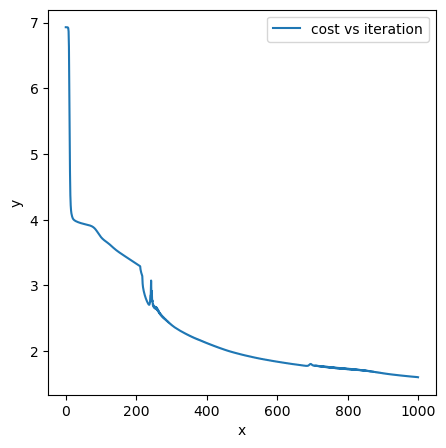

In [14]:
fig,ax = plt.subplots(1,1,figsize = (5,5))
ax.plot(j_history[:1000],label = 'cost vs iteration')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()
plt.show()

In [16]:
y_pred_train = predict(x_train,parameters)
print(y_pred_train)

[7 4 6 ... 9 4 0]


In [18]:
acc1 = np.mean(y_train_multiclass == y_pred_train)*100

In [19]:
print(acc1)

74.51


In [22]:
dataset_test = pd.read_csv("classification_test.csv")
x_test = dataset_test.iloc[:,1:785].values
x_test = x_test.T

In [23]:
y_pred_test = predict(x_test,parameters)

C:\Users\HP\AppData\Local\Temp\ipykernel_12004\2027792172.py:13: RuntimeWarning: overflow encountered in exp
  g = 1/(1 + np.exp(-x))


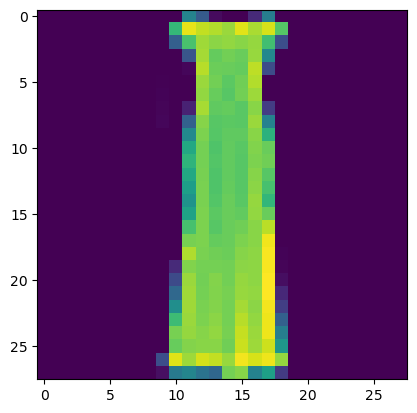

4


In [30]:
index = random.randrange(0,x_test.shape[1])
plt.imshow(x_train[:,index].reshape(28,28))
plt.show()
print(y_pred_test[index])